In [1]:
from brian2 import *
prefs.codegen.target = 'cython'  # 强制使用Cython
print("当前Brian2后端:", prefs.codegen.target)

# 测试一个最小网络
start_scope()
G = NeuronGroup(10, 'dv/dt = -v/(10*ms) : 1', threshold='v>10', reset='''v=0''')
S = Synapses(G, G, 'w : 1', on_pre='v += w')
S.connect(condition='i != j')  # 触发Cython编译
net = Network(G, S)
net.run(1*ms)
print("运行成功!")

当前Brian2后端: cython


INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.05s). [brian2.stateupdaters.base.method_choice]


运行成功!


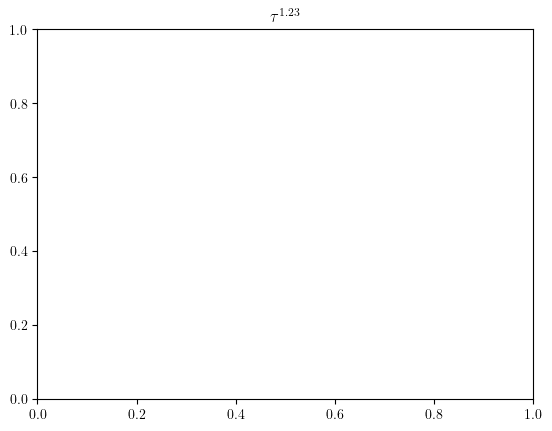

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,  # 启用 LaTeX 渲染
    "font.family": "serif",  # 使用衬线字体（类似 LaTeX 默认）
    "font.serif": ["Times New Roman"]  # 指定字体
})
slope = 1.23456789
slope_str = f'{slope:.2f}'
plt.figure()
plt.title(rf'$\tau^{{{slope_str}}}$')
plt.show()


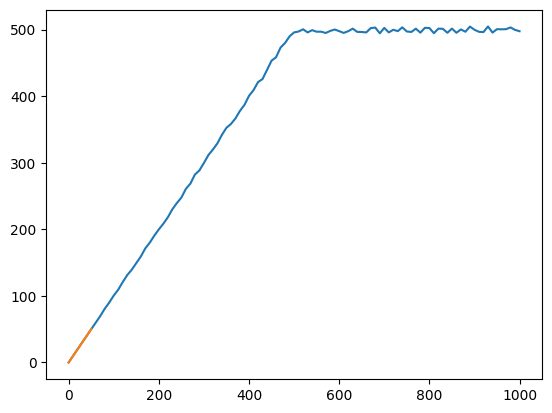

In [69]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

t = np.linspace(0, 1000, 101)
p = 50
msd = np.copy(t)
msd[p:] = msd[p:] - np.linspace(1, msd[-1]-msd[p], len(msd)-p)
msd = msd * (1 + 0.02 * (np.random.rand(*msd.shape) - 0.5))

def find_best(t,msd,min_points=5):
    n = len(t)
    best_r2 = -np.inf
    best_range = min_points
    for end in range(min_points, n+1):
        x=t[:end].reshape(-1,1)
        y=msd[:end]
        model = LinearRegression().fit(x,y)
        r2 = model.score(x,y)
        if r2 > best_r2:
            best_r2 = r2
            best_end = end
    return best_end
end = find_best(t,msd)
x_fit = t[:end]
y_fit = msd[:end]
model = LinearRegression().fit(x_fit.reshape(-1,1),y_fit)
y_pred = model.predict(x_fit.reshape(-1,1))
plt.plot(t, msd)
plt.plot(x_fit,y_pred)